# Toy sensor arrays

In [1]:
using DataFrames
using Gadfly
using LinearAlgebra, Statistics
import Cairo, Fontconfig
using Compose
using Printf

theme = Theme(minor_label_font_size=16pt, major_label_font_size=16pt, 
    key_title_font_size=16pt, point_label_font_size=16pt, key_label_font_size=14pt)

function all_pairs(n::Int) # all possible pairs
    pairs = Tuple[]
    for i = 1:n
        for j = (i+1):n
            push!(pairs, (i, j))
        end
    end
    return pairs
end

pairs = all_pairs(3)

3-element Array{Tuple,1}:
 (1, 2)
 (1, 3)
 (2, 3)

In [2]:
df = DataFrame(MOF=[], HA=[], HB=[])
push!(df, ["MOF-1", 10.0, 1.0])
push!(df, ["MOF-2", 12.0, 20.0])
push!(df, ["MOF-3", 1.0, 10.0])
df

3×3 DataFrame
│ Row │ MOF   │ HA   │ HB   │
│     │ Any   │ Any  │ Any  │
├─────┼───────┼──────┼──────┤
│ 1   │ MOF-1 │ 10.0 │ 1.0  │
│ 2   │ MOF-2 │ 12.0 │ 20.0 │
│ 3   │ MOF-3 │ 1.0  │ 10.0 │

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping(::DataFrame, ::Symbol) at dataframes.jl:96
└ @ Gadfly /home/simoncor/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


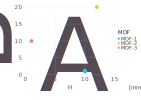

In [3]:
function plot_H_scatter(df)
    myplot = plot(df, x=:HA, y=:HB, color=:MOF, size=[2.0mm, 2.0mm, 2mm],
        Guide.xlabel("H<sub>A</sub> [mmol/bar]"),
        Guide.ylabel("H<sub>B</sub> [mmol/bar]"),
        theme
    )
end
plot_H_scatter(df)

In [4]:
# draw(PNG("H_scatter.png", 4inch, 3inch, dpi=300), myplot)

In [5]:
function build_H(df::DataFrame, mof_id_1::Int, mof_id_2::Int)
    H = [df[mof_id_1, :HA] df[mof_id_1, :HB];
         df[mof_id_2, :HA] df[mof_id_2, :HB]]
    
    return H
end

build_H (generic function with 1 method)

best pair: (1, 3)


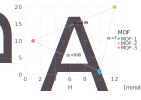

In [6]:
function graphically_explore_pairs(df, pairs, edges_to_draw)
    layers = [layer(df, x=:HA, y=:HB, color=:MOF, size=[2.0mm, 2.0mm, 2mm])]
    annotations = Gadfly.Guide.Annotation[]
    
    σ_2s = []
    for pair in pairs
        H = build_H(df, pair[1], pair[2])
        σ_2 = minimum(svd(H).S)
        push!(σ_2s, σ_2)
        # draw line connecting two MOFs to represent a pair
        if pair in edges_to_draw
            lyr = layer(x=H[:, 1], y=H[:, 2], Geom.line, Theme(default_color=colorant"light gray"))
            push!(layers, lyr)
            # annotate with smallest singular value
            HA = mean(H[:, 1])
            HB = mean(H[:, 2])
            annotation = compose(context(), text(HA, HB, @sprintf("σ₂=%.2f", σ_2)))
            push!(annotations, Guide.annotation(annotation))
        end
    end
    
    println("best pair: ", pairs[argmax(σ_2s)])

    myplot = plot(layers...,
        Guide.xlabel("H<sub>A</sub> [mmol/(g-bar)]"),
        Guide.ylabel("H<sub>B</sub> [mmol/(g-bar)]"),
        annotations...,
        theme,
        Scale.y_continuous(minvalue=0.0),
        Scale.x_continuous(minvalue=0.0),
        Guide.xticks(ticks=0.0:0.2:1.0),
        Guide.yticks(ticks=0.0:0.2:1.0),
    )
    return myplot
end

graphically_explore_pairs(df, pairs, pairs)

Counter example

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[7]:5
└ @ Core In[7]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[7]:5
└ @ Core In[7]:5


MOF with highest S_(B/A): 1
MOF with highest S_(A/B): 2
best pair: (2, 3)


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[7]:5
└ @ Core In[7]:5


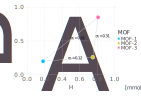

In [7]:
df = DataFrame(MOF=[], HA=[], HB=[])
push!(df, ["MOF-1", 0.18, 0.20])
push!(df, ["MOF-2", 0.75, 0.26])
push!(df, ["MOF-3", 0.81, 0.85])
df[:S_B_A] = df[:HB] ./ df[:HA]
println("MOF with highest S_(B/A): ", argmax(df[:, :S_B_A]))
println("MOF with highest S_(A/B): ", argmin(df[:, :S_B_A]))

pairs = all_pairs(size(df, 1))
myplot = graphically_explore_pairs(df, pairs, pairs)

In [8]:
draw(PDF("curate_MOFs_based_on_selectivity_failure.pdf", 5inch, 4inch), myplot)

MOF with highest S_(B/A): 1
MOF with highest S_(A/B): 5


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:8
└ @ Core In[9]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:8
└ @ Core In[9]:8
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[9]:8
└ @ Core In[9]:8


best pair: (4, 6)


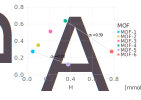

In [9]:
df = DataFrame(MOF=[], HA=[], HB=[])
push!(df, ["MOF-1", 0.05, 0.275])
push!(df, ["MOF-2", 0.1, 0.35])
push!(df, ["MOF-3", 0.2125, 0.5125])
push!(df, ["MOF-4", 0.35, 0.6375])
push!(df, ["MOF-5", 0.375, 0.125])
push!(df, ["MOF-6", 0.775, 0.275])

df[:S_B_A] = df[:HB] ./ df[:HA]
println("MOF with highest S_(B/A): ", argmax(df[:, :S_B_A]))
println("MOF with highest S_(A/B): ", argmin(df[:, :S_B_A]))

pairs = all_pairs(size(df, 1))

myplot = graphically_explore_pairs(df, pairs, [(1, 5), (4, 6)])

In [10]:
draw(PDF("curate_MOFs_based_on_selectivity_failure2.pdf", 5inch, 4inch), myplot)